In [1]:
from scipy.io import mmread
from scipy.sparse import csr_matrix
import anndata as ad
import pandas as pd
import numpy as np
# import scanorama
import scanpy as sc
import os, sys, time
import scipy.io as sio


In [7]:
os.getcwd()

'/home/math/hyl2016/Intergration_Benchmark/BenchmarkRealDataset/RNA_ATAC'

In [15]:
adata = mmread("./11_GSE194122/s4d8/ATAC/matrix.mtx")

In [16]:
adata

<113600x9876 sparse matrix of type '<class 'numpy.float64'>'
	with 36863327 stored elements in COOrdinate format>

In [17]:
sum(sum(adata.toarray()==1))

36863327

In [2]:
adata_raw = sc.read_h5ad("./11_GSE194122/GSE194122_openproblems_neurips2021_multiome_BMMC_processed.h5ad")

In [5]:
ADT = adata_raw[:,adata_raw.var['feature_types']=='ADT']
RNA = adata_raw[:,adata_raw.var['feature_types']=='GEX']

In [4]:
adata_raw.obs['batch'].value_counts()

s4d8     9876
s4d1     8023
s3d10    6781
s1d2     6740
s1d1     6224
s2d4     6111
s2d5     4895
s3d3     4325
s4d9     4325
s1d3     4279
s2d1     4220
s3d7     1771
s3d6     1679
Name: batch, dtype: int64

/home/math/hyl2016/miniconda3/envs/scvi/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:391: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


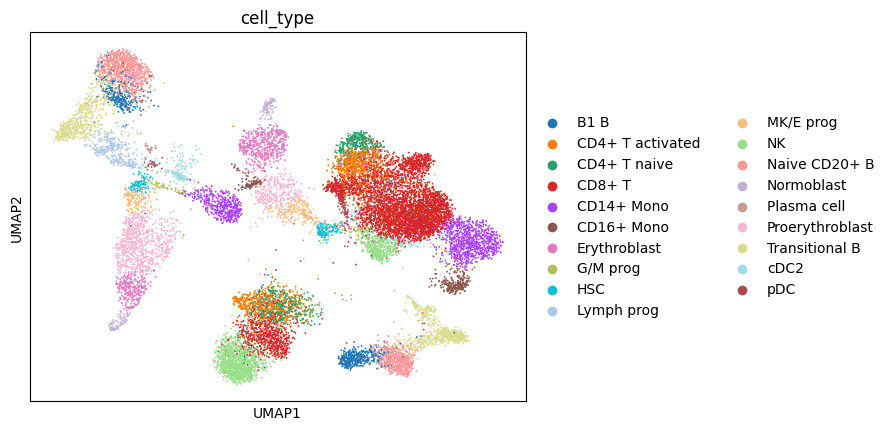

/home/math/hyl2016/miniconda3/envs/scvi/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:391: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


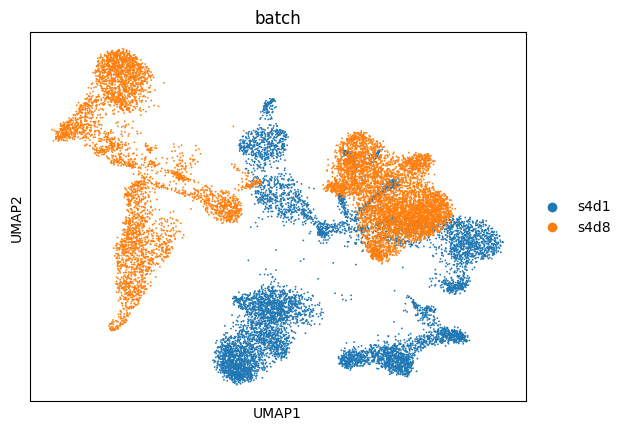

In [6]:
idx = [ing in ['s4d8', 's4d1'] for ing in adata_raw.obs['batch']]
adata = adata_raw[idx,]
adata.obsm['X_umap'] = adata.obsm['GEX_X_umap']
sc.pl.umap(adata, color='cell_type')
sc.pl.umap(adata, color='batch')